This notebook implements the gradient descent algorithm for a simple artificial neuron. The neuron will learn to compute logical OR. The neuron model and logical OR, for inputs $x_0$ and $x_1$ and target output $y$.

In [0]:
# Import libraries
from __future__ import print_function
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

We create `torch.tensor` objects for representing the data matrix `D` with targets `Y`. Each row of `D` is a different data point.

In [0]:
D = np.zeros((4,2),dtype=float)
D[0,:] = [0.,0.]
D[1,:] = [0.,1.]
D[2,:] = [1.,0.]
D[3,:] = [1.,1.]
D = torch.tensor(D,dtype=torch.float)
Y = torch.tensor([0.,1.,1.,1.])
N = D.shape[0] # number of input patterns

The artificial neuron operates as follows. Given an input vector $x$, the net input ($\textbf{net}$) to the neuron is computed as follows

$$ \textbf{net} = \sum_i x_i w_i + b,$$

for weights $w_i$ and bias $b$. The activation function $g(\textbf{net})$ is the logistic function

$$ g(\textbf{net}) = \frac{1}{1+e^{-\textbf{net}}},$$

which is used to compute the predicted output $\hat{y} = g(\textbf{net})$. Finally, the loss (squared error) for a particular pattern $x$ is defined as 

$$ E(w,b) = (\hat{y}-y)^2,$$

where the target output is $y$. Here we manually compute the gradients of the loss $E$ with respect to the neuron parameters:

$$\frac{\partial E(w,b)}{\partial w}, \frac{\partial E(w,b)}{\partial b}.$$

By manually, we mean to program the gradient computation directly, using the formulas discussed in class. This is in contrast to using PyTorch's `autograd` (Automatric differentiation) that computes the gradient automatically, as discussed in class, lab, and in the PyTorch tutorial (e.g., `loss.backward()`). First, let's write the activation function and the loss in PyTorch.

In [0]:
def g_logistic(net):
    return 1. / (1.+torch.exp(-net))

def loss(yhat,y):
    return (yhat-y)**2

Next, we'll also write two functions for examining the internal operations of the neuron, and the gradients of its parameters.

In [0]:
def print_forward(x,yhat,y):
    # Examine network's prediction for input x
    print(' Input: ',end='')
    print(x.numpy())
    print(' Output: ' + str(round(yhat.item(),3)))
    print(' Target: ' + str(y.item()))

def print_grad(grad_w,grad_b):
    # Examine gradients
    print('  d_loss / d_w = ',end='')
    print(grad_w)
    print('  d_loss / d_b = ',end='')
    print(grad_b)

Now let's begin the implementation of stochastic gradient descent. We'll initialize our parameters $w$ and $b$ randomly, and proceed through a series of epochs of training. Each epoch involves visiting the four training patterns in random order, and updating the parameters after each presentation of an input pattern.


Compute the gradient manually
 Input: [1. 0.]
 Output: 0.779
 Target: 1.0
  d_loss / d_w = [-0.07623821 -0.        ]
  d_loss / d_b = [-0.07623821]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [-0.07623821 -0.        ]
  d_loss / d_b = [-0.07623821]

Compute the gradient manually
 Input: [1. 1.]
 Output: 0.835
 Target: 1.0
  d_loss / d_w = [-0.04542459 -0.04542459]
  d_loss / d_b = [-0.04542459]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [-0.04542459 -0.04542459]
  d_loss / d_b = [-0.04542459]

Compute the gradient manually
 Input: [0. 1.]
 Output: 0.723
 Target: 1.0
  d_loss / d_w = [-0.         -0.11125127]
  d_loss / d_b = [-0.11125127]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [ 0.         -0.11125129]
  d_loss / d_b = [-0.11125129]

Compute the gradient manually
 Input: [0. 0.]
 Output: 0.692
 Target: 0.0
  d_loss / d_w = [0. 0.]
  d_loss / d_b = [0.29492965]
Compute the gradient using PyTorch .backward()
  d_loss / d_w

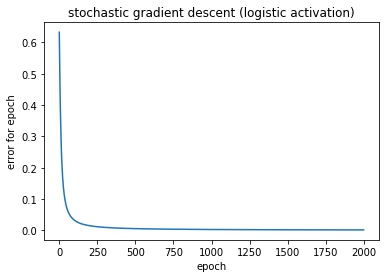

In [0]:
# Initialize parameters
#     Although you will implement gradient descent manually, let's set requires_grad=True
#     anyway so PyTorch will track the gradient too, and we can compare your gradient with PyTorch's.
w = torch.rand(2,requires_grad=True) # [size 2] tensor
b = torch.rand(1,requires_grad=True) # [size 1] tensor

alpha = 0.05 # learning rate
nepochs = 2000 # number of epochs

track_error = []
verbose = True
for e in range(nepochs): # for each epoch
    error_epoch = 0. # sum loss across the epoch
    perm = np.random.permutation(N)
    for p in perm: # visit data points in random order
        x = D[p,:] # input pattern
        
        # compute output of neuron
        net = torch.dot(x,w)+b
        yhat = g_logistic(net)
        
        # compute loss
        y = Y[p]
        myloss = loss(yhat,y)
        error_epoch += myloss.item()
        
        # print output if this is the last epoch
        if (e == nepochs-1):
            print("Final result:")
            print_forward(x,yhat,y)
            print("")

        # Compute the gradient manually
        if verbose:
            print('Compute the gradient manually')
            print_forward(x,yhat,y)
        with torch.no_grad():
            # TODO : YOUR GRADIENT CODE GOES HERE
            #  two lines of the form
            #    w_grad = ...    ([size 2] PyTorch tensor)
            #    b_grad = ...    ([size 1] PyTorch tensor)
            #  make sure to inclose your code in the "with torch.no_grad()" wrapper,
            #   otherwise PyTorch will try to track the "gradient" of the gradient computation, which we don't want.
            w_grad = 2*(yhat - y)*yhat*(1 - yhat)*x
            b_grad = 2*(yhat - y)*yhat*(1 - yhat)
        if verbose: print_grad(w_grad.numpy(),b_grad.numpy())

        # Compute the gradient with PyTorch and compre with manual values
        if verbose: print('Compute the gradient using PyTorch .backward()')
        myloss.backward()
        if verbose:
            print_grad(w.grad.numpy(),b.grad.numpy())
            print("")
        w.grad.zero_() # clear PyTorch's gradient
        b.grad.zero_()
        
        # Parameter update with gradient descent
        with torch.no_grad():
            # TODO : YOUR PARAMETER UPDATE CODE GOES HERE
            #  two lines of the form:
            #    w -=   ....
            #    b -=   ....
            w -= w_grad
            b -= b_grad 
            
    if verbose==True: verbose=False
    track_error.append(error_epoch)
    if e % 50 == 0:
        print("epoch " + str(e) + "; error=" +str(round(error_epoch,3)))
    
# track output of gradient descent
plt.figure()
plt.clf()
plt.plot(track_error)
plt.title('stochastic gradient descent (logistic activation)')
plt.ylabel('error for epoch')
plt.xlabel('epoch')
plt.show()

Now let's change the activation function to "tanh" from the "logistic" function, such that $g(\textbf{net}) = \tanh(\textbf{net})$.

In [0]:
def g_tanh(x):
    return (torch.exp(x) - torch.exp(-x))/(torch.exp(x) + torch.exp(-x))

The derivative of the tanh function is as follows:

$$\frac{\partial g(\textbf{net})}{\partial \textbf{net}}= \frac{\partial \tanh(\textbf{net})}{\partial \textbf{net}} = 1.0 - (\tanh(\textbf{net}))^2$$

Compute the gradient manually
 Input: [0. 0.]
 Output: 0.628
 Target: 0.0
  d_loss / d_w = [0. 0.]
  d_loss / d_b = [0.7605431]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [0. 0.]
  d_loss / d_b = [0.7605431]

Compute the gradient manually
 Input: [1. 0.]
 Output: 0.092
 Target: 1.0
  d_loss / d_w = [-1.800984 -0.      ]
  d_loss / d_b = [-1.800984]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [-1.8009839  0.       ]
  d_loss / d_b = [-1.8009839]

Compute the gradient manually
 Input: [1. 1.]
 Output: 0.999
 Target: 1.0
  d_loss / d_w = [-1.0849742e-06 -1.0849742e-06]
  d_loss / d_b = [-1.0849742e-06]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [-1.0848744e-06 -1.0848744e-06]
  d_loss / d_b = [-1.0848744e-06]

Compute the gradient manually
 Input: [0. 1.]
 Output: 0.976
 Target: 1.0
  d_loss / d_w = [-0.         -0.00222303]
  d_loss / d_b = [-0.00222303]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [ 0.     

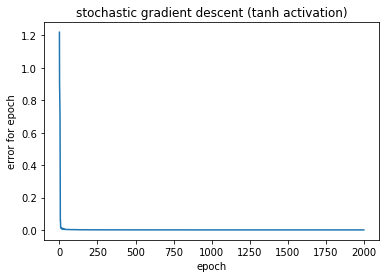

In [0]:
# Initialize parameters
#     Although you will implement gradient descent manually, let's set requires_grad=True
#     anyway so PyTorch will track the gradient too, and we can compare your gradient with PyTorch's.
w = torch.rand(2,requires_grad=True) # [size 2] tensor
b = torch.rand(1,requires_grad=True) # [size 1] tensor

alpha = 0.05 # learning rate
nepochs = 2000 # number of epochs

track_error = []
verbose = True
for e in range(nepochs): # for each epoch
    error_epoch = 0. # sum loss across the epoch
    perm = np.random.permutation(N)
    for p in perm: # visit data points in random order
        x = D[p,:] # input pattern
        
        # compute output of neuron
        net = torch.dot(x,w)+b
        yhat = g_tanh(net)
        
        # compute loss
        y = Y[p]
        myloss = loss(yhat,y)
        error_epoch += myloss.item()
        
        # print output if this is the last epoch
        if (e == nepochs-1):
            print("Final result:")
            print_forward(x,yhat,y)
            print("")

        # Compute the gradient manually
        if verbose:
            print('Compute the gradient manually')
            print_forward(x,yhat,y)
        with torch.no_grad():
            # TODO : YOUR GRADIENT CODE GOES HERE
            #  two lines of the form
            #    w_grad = ...    ([size 2] PyTorch tensor)
            #    b_grad = ...    ([size 1] PyTorch tensor)
            #  make sure to inclose your code in the "with torch.no_grad()" wrapper,
            #   otherwise PyTorch will try to track the "gradient" of the graident computation, which we don't want.
            w_grad = 2*(yhat-y)*(1-yhat**2)*x
            b_grad = 2*(yhat-y)*(1-yhat**2)
                                   
        if verbose: print_grad(w_grad.numpy(),b_grad.numpy())

        # Compute the gradient with PyTorch and compre with manual values
        if verbose: print('Compute the gradient using PyTorch .backward()')
        myloss.backward()
        if verbose:
            print_grad(w.grad.numpy(),b.grad.numpy())
            print("")
        w.grad.zero_() # clear PyTorch's gradient
        b.grad.zero_()
        
        # Parameter update with gradient descent
        with torch.no_grad():
            # TODO : YOUR PARAMETER UPDATE CODE GOES HERE
            #  two lines of the form:
            #    w -=   ....
            #    b -=   ....
            w -= w_grad
            b -= b_grad
            
            
    if verbose==True: verbose=False
    track_error.append(error_epoch)
    if e % 50 == 0:
        print("epoch " + str(e) + "; error=" +str(round(error_epoch,3)))
    
# track output of gradient descent
plt.figure()
plt.clf()
plt.plot(track_error)
plt.title('stochastic gradient descent (tanh activation)')
plt.ylabel('error for epoch')
plt.xlabel('epoch')
plt.show()